In [1]:
%%capture
!pip install gensim

In [2]:
import gensim.downloader as api
model=api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [3]:
model.similarity(w1="good",w2="great")

0.72915095

In [6]:
model.similar_by_word("pakistan")

[('pakistani', 0.7021999359130859),
 ('sri_lanka', 0.6819918155670166),
 ('india', 0.6815167665481567),
 ('kashmir', 0.6724816560745239),
 ('iran', 0.6570129990577698),
 ('saudi_arabia', 0.6349577903747559),
 ('srilanka', 0.6323924660682678),
 ('taliban', 0.6323547959327698),
 ('manmohan', 0.6289611458778381),
 ('bangladesh', 0.6285390257835388)]

In [7]:
model.most_similar(positive=["france","berlin"],negative=["paris"])

[('germany', 0.5094343423843384),
 ('european', 0.48650455474853516),
 ('german', 0.4714890420436859),
 ('austria', 0.46964022517204285),
 ('swedish', 0.4645182490348816),
 ('Wissenschaft', 0.4532880485057831),
 ('denmark', 0.4477355182170868),
 ('München', 0.4438532590866089),
 ('europe', 0.4420619308948517),
 ('belgium', 0.43769752979278564)]

In [8]:
model.most_similar(positive=["king","woman"],negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [11]:
model.doesnt_match(["man","woman","boy","girl"])

'man'

In [12]:
import pandas as pd
import numpy as np

In [14]:
vector=model["good"]
vector.shape

(300,)

In [15]:
df=pd.read_csv("/content/Fake_Real_Data.csv")

In [16]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [17]:
df.isnull().sum()

,0
Text,0
label,0


In [18]:
df['label_num']=df.label.apply(lambda x : 1 if x == "Real" else 0)
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [23]:
import spacy
preprocessor=spacy.load("en_core_web_lg")

In [22]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
def preprocess_vectorize(text):
  doc=preprocessor(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_punct and token.is_stop:
      continue
    filtered_tokens.append(token.lemma_)
  return model.get_mean_vector(filtered_tokens)

In [28]:
preprocess_vectorize("Arham khan is a good boy").shape

(300,)

In [29]:
df['vectors']=df.Text.apply(lambda text: preprocess_vectorize(text))

In [30]:
df.to_csv("preprocess.csv")

In [31]:
df.head()

,Text,label,label_num,vectors
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.017310064, 0.015067152, 0.008186125, 0.0387..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.015988229, 0.009727976, 0.015578468, 0.0332..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.019331463, 0.01067083, 0.011367614, 0.04468..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01604314, 0.015978297, 0.01628747, 0.036516..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[0.0062056324, 0.013996333, 0.013250186, 0.038..."


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [33]:
X_train,X_test,y_train,y_test=train_test_split(
    df.vectors.values,
    df.label_num,
    test_size=0.2,
    random_state=42,
    stratify=df.label_num

)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7920,), (1980,), (7920,), (1980,))

In [36]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
# model=RandomForestClassifier()
# model=LogisticRegression()
# model=DecisionTreeClassifier()
model=GradientBoostingClassifier()
model.fit(X_train_2d,y_train)

GradientBoostingClassifier()

In [52]:
model.score(X_test_2d,y_test)

0.9843434343434343

In [53]:
y_pred=model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1000
           1       0.99      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



<Axes: >

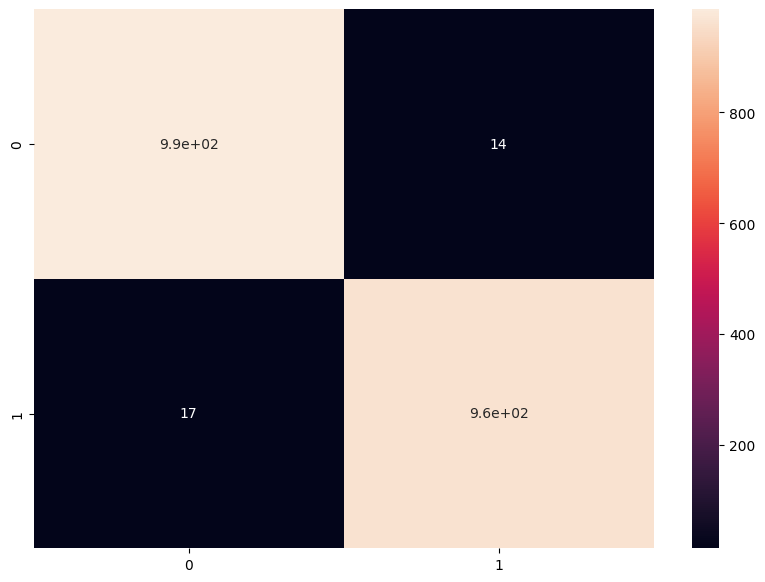

In [54]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)